In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop('label',axis = 1)
y = df['label']

from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [10]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

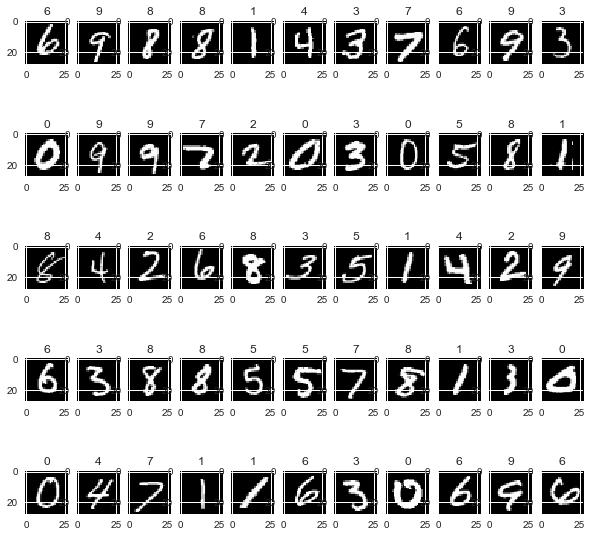

In [14]:
#showing the images on grid
%matplotlib inline
plt.figure(figsize=(10,10))
y, x = 5,11
for i in range(0,(y*x)):
    plt.subplot(y,x,i+1)
    ni = np.random.randint(0,len(X_train),1)[0] # gives the Random number within the limit of Dataframe
    v = str(y_train.iloc[ni]) #getting the label of the image
    show_image(X_train.iloc[ni],(28,28), v, cmp = 'gray')
plt.show()

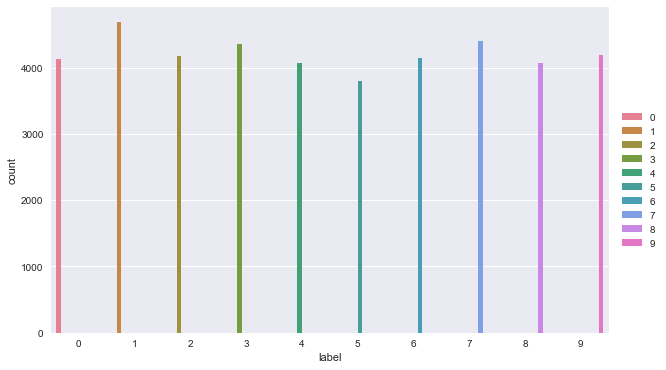

In [30]:
# DATA ANALYSIS
# count of each digit in Data set
plt.figure(figsize=(10,6))
sns.countplot(data=df,x = df['label'],hue = 'label',palette='husl')
plt.legend(loc='upper right', bbox_to_anchor = (1.1, 0.7))


(array([ 4132.,  4684.,     0.,  4177.,     0.,  4351.,  4072.,     0.,
         3795.,     0.,  4137.,  4401.,     0.,  4063.,  4188.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
         6.6,  7.2,  7.8,  8.4,  9. ]),
 <a list of 15 Patch objects>)

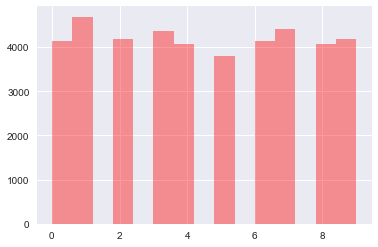

In [42]:
plt.hist(df['label'],bins=15,color='red',alpha =0.4)

In [44]:
#Implimenting machine learning model
from sklearn.neural_network import MLPClassifier


In [45]:
#Normalising the Data
X_train = X_train/255.0
X_test = X_test/255.0

In [46]:
nn = MLPClassifier(hidden_layer_sizes=(1000,1200,1200), batch_size=30,alpha = 1e-3,verbose=4,random_state=42,momentum=0)

In [47]:
nn.fit(X_train,y_train)

Iteration 1, loss = 0.36234606
Iteration 2, loss = 0.18759555
Iteration 3, loss = 0.14826356
Iteration 4, loss = 0.12729738
Iteration 5, loss = 0.11103155
Iteration 6, loss = 0.11367313
Iteration 7, loss = 0.09528522
Iteration 8, loss = 0.08895567
Iteration 9, loss = 0.08004548
Iteration 10, loss = 0.09022985
Iteration 11, loss = 0.08195209
Iteration 12, loss = 0.06964244
Iteration 13, loss = 0.07877213
Iteration 14, loss = 0.08072876
Iteration 15, loss = 0.06536275
Iteration 16, loss = 0.05594460
Iteration 17, loss = 0.06757065
Iteration 18, loss = 0.06816458
Iteration 19, loss = 0.05469022
Iteration 20, loss = 0.05798353
Iteration 21, loss = 0.06337320
Iteration 22, loss = 0.05063097
Iteration 23, loss = 0.05508174
Iteration 24, loss = 0.05256851
Iteration 25, loss = 0.04579823
Iteration 26, loss = 0.06073251
Iteration 27, loss = 0.05217346
Iteration 28, loss = 0.04631710
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.001, batch_size=30, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1200, 1200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=4,
       warm_start=False)

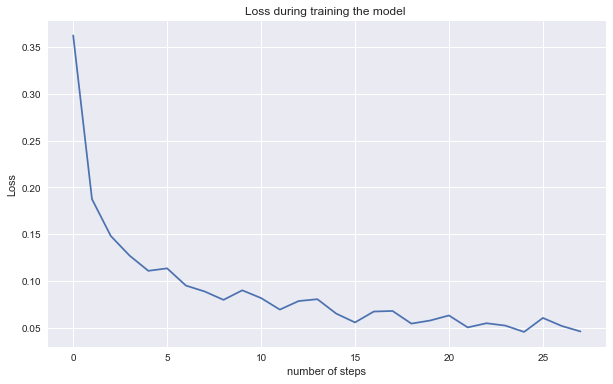

In [52]:
#plotting the loss curve 
plt.figure(figsize=(10,6))
plt.plot(nn.loss_curve_)
plt.xlabel('number of steps')
plt.ylabel('Loss')
plt.title('Loss during training the model ')


In [53]:
#Lets evaluate the model
pred = nn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print (classification_report(pred,y_test))
print (confusion_matrix(pred,y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2480
          1       0.99      0.99      0.99      2805
          2       0.96      0.98      0.97      2484
          3       0.96      0.97      0.97      2628
          4       0.96      0.99      0.97      2411
          5       0.96      0.98      0.97      2194
          6       0.99      0.97      0.98      2520
          7       0.98      0.97      0.97      2672
          8       0.97      0.97      0.97      2435
          9       0.97      0.94      0.96      2571

avg / total       0.97      0.97      0.97     25200

[[2439    0   11    1    3    2   10    1    3   10]
 [   0 2767    5    2    9    2    3    5    9    3]
 [   3    9 2432   12    2    0    0   16    9    1]
 [   3    3   15 2540    0   30    0    3   19   15]
 [   1    0   15    0 2375    0    6    5    7    2]
 [   2    0    2   26    1 2140    5    3   11    4]
 [  12    4    8    2    5   25 2457    0  

# Filtering the model again for best fit.

In [67]:
#changing the learning rate parameter of the model to 1.
nn = MLPClassifier(hidden_layer_sizes=(1568,1568), activation='relu',learning_rate_init=0.005,learning_rate= 'constant',batch_size=30,alpha = 5e-3,verbose=4,random_state=42,momentum=0)

In [68]:
nn.fit(X_train,y_train)

Iteration 1, loss = 0.55247057
Iteration 2, loss = 0.33779253
Iteration 3, loss = 0.29156519
Iteration 4, loss = 0.26594961
Iteration 5, loss = 0.24945174
Iteration 6, loss = 0.24073236
Iteration 7, loss = 0.21333935
Iteration 8, loss = 0.21513956
Iteration 9, loss = 0.21692312
Iteration 10, loss = 0.18690481
Iteration 11, loss = 0.19023980
Iteration 12, loss = 0.18313356
Iteration 13, loss = 0.19220844
Iteration 14, loss = 0.19241233
Iteration 15, loss = 0.17307965
Iteration 16, loss = 0.17793024
Iteration 17, loss = 0.17084969
Iteration 18, loss = 0.17629003
Iteration 19, loss = 0.17467393
Iteration 20, loss = 0.16975090
Iteration 21, loss = 0.16815563
Iteration 22, loss = 0.16762648
Iteration 23, loss = 0.16519432
Iteration 24, loss = 0.16375045
Iteration 25, loss = 0.16687888
Iteration 26, loss = 0.16796675
Iteration 27, loss = 0.16795524
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.005, batch_size=30, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1568, 1568), learning_rate='constant',
       learning_rate_init=0.005, max_iter=200, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=4,
       warm_start=False)

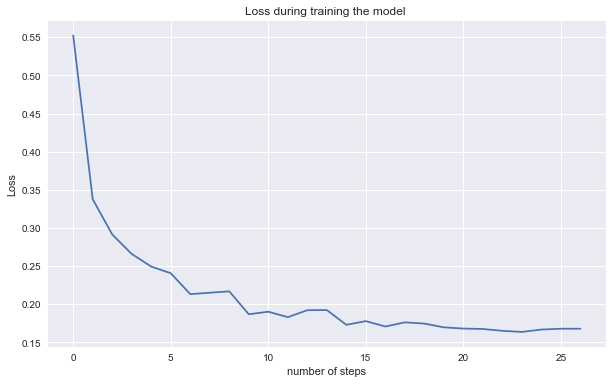

In [69]:
#plotting the loss curve 
plt.figure(figsize=(10,6))
plt.plot(nn.loss_curve_)
plt.xlabel('number of steps')
plt.ylabel('Loss')
plt.title('Loss during training the model ')

In [70]:
#Lets evaluate the model
pred = nn.predict(X_test)

In [71]:
print (classification_report(pred,y_test))
print (confusion_matrix(pred,y_test))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      2517
          1       0.99      0.97      0.98      2873
          2       0.97      0.94      0.95      2599
          3       0.94      0.96      0.95      2575
          4       0.93      0.98      0.96      2366
          5       0.94      0.95      0.95      2205
          6       0.96      0.98      0.97      2461
          7       0.96      0.97      0.96      2620
          8       0.95      0.95      0.95      2439
          9       0.94      0.92      0.93      2545

avg / total       0.96      0.96      0.96     25200

[[2423    0    9    6    6   12   25    7   11   18]
 [   0 2775    8    4   22    5   10    8   32    9]
 [   5    9 2440   52    9   13   14   27   25    5]
 [   4    1    2 2475    0   44    0    1   19   29]
 [   4    0   10    0 2322    0    4    9    3   14]
 [   6    1    3   30    2 2102   24    6   15   16]
 [  15    1    8    1   12   15 2400    1  

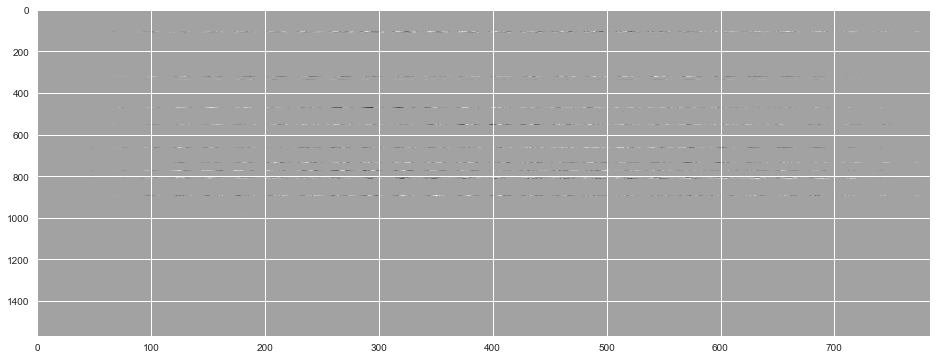

In [91]:
#plotting the weights 
fig,ax = plt.subplots(1,1, figsize =(16,6))
ax.imshow((np.transpose(nn.coefs_[0])), cmap ='gray', aspect = 'auto')


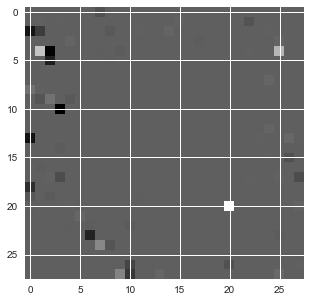

In [119]:
#Plotting singular weight from hidden layer neuron 2
fig,ax = plt.subplots(1,figsize=(5,5))
hidden_2 = np.transpose(nn.coefs_[0])[2]
ax.imshow(hidden_2.reshape(28,28), cmap = 'gray', aspect = 'auto')


# Using Random forest method

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf = RandomForestClassifier(n_estimators=300,verbose=3,random_state=3)
rf.fit(X_train,y_train)

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 30

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=3,
            verbose=3, warm_start=False)

In [191]:
p2 = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished


In [192]:
print (classification_report(p2,y_test))
print (confusion_matrix(p2,y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2494
          1       0.98      0.98      0.98      2800
          2       0.95      0.95      0.95      2528
          3       0.94      0.95      0.94      2610
          4       0.95      0.96      0.95      2471
          5       0.95      0.96      0.95      2205
          6       0.97      0.96      0.97      2525
          7       0.96      0.96      0.96      2630
          8       0.94      0.94      0.94      2424
          9       0.93      0.92      0.93      2513

avg / total       0.96      0.96      0.96     25200

[[2432    0    9    5    4   11   17    2    4   10]
 [   0 2741    9    6    4    3    5   11   14    7]
 [   3   15 2408   38    7    1    2   33   14    7]
 [   1    9   15 2469    0   31    0    4   34   47]
 [   2    5   24    2 2366    4   10   14   11   33]
 [   3    4    3   33    0 2114   18    1   18   11]
 [  11   10   13    7   14   32 2425    0  